In [3]:
#I have multiple types of data files here in multiple formats. The data can be from:
#Strava
#Garmin
#TrainingPeaks
#AppleHealth (Questionable)

### Inputs:
#
#
#  Raw .csv files or .xml files 

### Outputs:
#
#
#  Curated csv of all the data to be used in EDA, modeling, etc

In [331]:
#Imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json

In [3]:
#Let's inspect a .csv from garmin:
garmin = pd.read_csv('./data/raw/Garmin/BrianGetz_Activities.csv')

In [4]:
garmin.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Avg. Swolf,Avg Stroke Rate,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
0,Running,2021-02-01 16:57:42,False,Morton Running,3.29,356,00:24:15,158,177,3.0,...,--,--,24:15,0:00,0.0,0:00,No,02:11.51,4,0.0
1,Running,2021-01-30 13:31:55,False,Morton Running,1.88,214,00:20:02,130,144,1.7,...,--,--,20:02,0:00,0.0,0:00,No,09:22.95,2,0.0
2,Running,2021-01-29 15:54:41,False,Morton Running,2.91,321,00:24:07,145,154,2.6,...,--,--,24:07,0:00,0.0,0:00,No,07:27.09,3,0.0
3,Running,2021-01-28 09:43:06,False,Morton - Fartlek 1H1E x 15,9.00,999,01:08:56,162,177,4.6,...,--,--,1:08:56,0:00,0.0,0:00,No,01:00.00,44,0.0
4,Running,2021-01-26 16:33:47,False,Morton Running,3.21,426,00:23:23,--,--,--,...,--,--,23:23,0:00,0.0,0:00,No,01:28.40,4,0.0


In [5]:
garmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             595 non-null    object 
 1   Date                      595 non-null    object 
 2   Favorite                  595 non-null    bool   
 3   Title                     595 non-null    object 
 4   Distance                  595 non-null    object 
 5   Calories                  595 non-null    object 
 6   Time                      595 non-null    object 
 7   Avg HR                    595 non-null    object 
 8   Max HR                    595 non-null    object 
 9   Aerobic TE                595 non-null    object 
 10  Avg Run Cadence           595 non-null    object 
 11  Max Run Cadence           595 non-null    object 
 12  Avg Pace                  595 non-null    object 
 13  Best Pace                 595 non-null    object 
 14  Elev Gain 

In [7]:
#Let's read in a strava file:

In [6]:
strava = pd.read_csv('./data/raw/Strava/claire_strava_activities.csv')

In [7]:
strava.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
0,589807052,"May 17, 2016, 3:27:58 PM",Morning Ride,Ride,NaN,1791,8.34,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,590203279,"May 27, 2016, 11:43:46 PM",Afternoon Ride,Ride,NaN,1742,8.32,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,593258442,"May 30, 2016, 5:47:48 PM",GG bridge to OB,Ride,NaN,3183,12.06,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,594079803,"May 31, 2016, 3:42:24 PM",Morning Ride,Ride,NaN,1820,8.39,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594639978,"Jun 1, 2016, 1:30:33 AM",Evening Ride,Ride,NaN,1907,8.66,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
strava.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Relative Effort',
       'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight',
       'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed',
       'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low',
       'Elevation High', 'Max Grade', 'Average Grade',
       'Average Positive Grade', 'Average Negative Grade', 'Max Cadence',
       'Average Cadence', 'Max Heart Rate', 'Average Heart Rate', 'Max Watts',
       'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.start_time',


In [9]:
strava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 78 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     439 non-null    int64  
 1   Activity Date                                                                                   439 non-null    object 
 2   Activity Name                                                                                   439 non-null    object 
 3   Activity Type                                                                                   439 non-null    object 
 4   Activity Description                                                                            9 non-null      object 
 5   Elapsed Time   

In [14]:
#Ok what about a TrainingPeaks file?

In [10]:
tp = pd.read_csv('./data/raw/TrainingPeaks/workouts.csv')

In [11]:
tp.head()

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,...,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,PWRZone8Minutes,PWRZone9Minutes,PWRZone10Minutes,Rpe,Feeling
0,NaN,Bike,NaN,NaN,NaN,2016-12-01,NaN,178.979996,155.0,355.0,...,12.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Run,NaN,NaN,NaN,2016-12-02,NaN,7596.680176,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Run,NaN,NaN,NaN,2016-12-03,NaN,8260.419922,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Run,NaN,NaN,NaN,2016-12-03,NaN,498.399994,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Bike,NaN,NaN,NaN,2016-12-04,NaN,224.899994,132.0,298.0,...,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
tp.columns

Index(['Title', 'WorkoutType', 'WorkoutDescription', 'PlannedDuration',
       'PlannedDistanceInMeters', 'WorkoutDay', 'CoachComments',
       'DistanceInMeters', 'PowerAverage', 'PowerMax', 'Energy',
       'AthleteComments', 'TimeTotalInHours', 'VelocityAverage', 'VelocityMax',
       'CadenceAverage', 'CadenceMax', 'HeartRateAverage', 'HeartRateMax',
       'TorqueAverage', 'TorqueMax', 'IF', 'TSS', 'HRZone1Minutes',
       'HRZone2Minutes', 'HRZone3Minutes', 'HRZone4Minutes', 'HRZone5Minutes',
       'HRZone6Minutes', 'HRZone7Minutes', 'HRZone8Minutes', 'HRZone9Minutes',
       'HRZone10Minutes', 'PWRZone1Minutes', 'PWRZone2Minutes',
       'PWRZone3Minutes', 'PWRZone4Minutes', 'PWRZone5Minutes',
       'PWRZone6Minutes', 'PWRZone7Minutes', 'PWRZone8Minutes',
       'PWRZone9Minutes', 'PWRZone10Minutes', 'Rpe', 'Feeling'],
      dtype='object')

In [13]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    339 non-null    object 
 1   WorkoutType              658 non-null    object 
 2   WorkoutDescription       245 non-null    object 
 3   PlannedDuration          218 non-null    float64
 4   PlannedDistanceInMeters  40 non-null     float64
 5   WorkoutDay               658 non-null    object 
 6   CoachComments            19 non-null     object 
 7   DistanceInMeters         489 non-null    float64
 8   PowerAverage             125 non-null    float64
 9   PowerMax                 125 non-null    float64
 10  Energy                   125 non-null    float64
 11  AthleteComments          21 non-null     object 
 12  TimeTotalInHours         488 non-null    float64
 13  VelocityAverage          483 non-null    float64
 14  VelocityMax              0

In [14]:
tp.dropna(subset=['TimeTotalInHours']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 657
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    170 non-null    object 
 1   WorkoutType              488 non-null    object 
 2   WorkoutDescription       124 non-null    object 
 3   PlannedDuration          128 non-null    float64
 4   PlannedDistanceInMeters  18 non-null     float64
 5   WorkoutDay               488 non-null    object 
 6   CoachComments            15 non-null     object 
 7   DistanceInMeters         483 non-null    float64
 8   PowerAverage             125 non-null    float64
 9   PowerMax                 125 non-null    float64
 10  Energy                   125 non-null    float64
 11  AthleteComments          17 non-null     object 
 12  TimeTotalInHours         488 non-null    float64
 13  VelocityAverage          483 non-null    float64
 14  VelocityMax              0

In [15]:
#Maybe a quick graph to see what I can see?
garmin_run = garmin[garmin['Activity Type'] == 'Running']

In [16]:
len(garmin_run)

513

In [17]:
garmin_run['Distance'] = pd.to_numeric(garmin_run['Distance'])

<ipython-input-17-e3c8ac8722f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garmin_run['Distance'] = pd.to_numeric(garmin_run['Distance'])


In [18]:
garmin_run[garmin_run['Distance'] > 12.9]

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Avg. Swolf,Avg Stroke Rate,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
244,Running,2020-02-06 09:22:40,False,Steamboat Springs Running,18.03,"1,788",02:23:36,--,--,--,...,--,--,2:23:36,0:00,0.0,0:00,No,00:50.52,19,0.0
353,Running,2019-07-13 06:03:14,False,Aspen Running,26.03,"3,460",02:59:55,--,--,--,...,--,--,2:59:55,0:00,0.0,0:00,No,00:08.56,27,0.0
360,Running,2019-07-05 05:40:16,False,East Moline Running,14.01,"1,618",02:02:45,146,181,3.6,...,--,--,2:02:45,0:00,0.0,0:00,No,00:06.64,15,0.0
376,Running,2019-06-14 05:30:57,False,Lafayette Running,20.02,"2,372",02:48:41,153,175,3.8,...,--,--,2:48:41,0:00,0.0,0:00,No,00:10.64,21,0.0
382,Running,2019-06-11 14:50:53,False,Lafayette Running,13.33,"1,469",01:36:54,160,183,3.9,...,--,--,1:36:54,0:00,0.0,0:00,No,02:53.24,14,0.0
387,Running,2019-06-07 07:01:32,False,Broomfield Running,18.01,"2,234",02:26:30,162,187,4.5,...,--,--,2:26:30,0:00,0.0,0:00,No,00:04.09,19,0.0
392,Running,2019-06-04 08:15:05,False,Lafayette Running,14.09,"1,681",01:46:07,164,184,4.8,...,--,--,1:46:07,0:00,0.0,0:00,No,00:45.23,15,0.0
395,Running,2019-05-31 09:08:21,False,Lafayette Running,14.77,"1,967",01:56:29,--,--,--,...,--,--,1:56:29,0:00,0.0,0:00,No,06:33.54,15,0.0
403,Running,2019-05-24 13:13:10,False,Lafayette Running,15.01,"1,777",01:51:22,165,184,5.0,...,--,--,1:51:22,0:00,0.0,0:00,No,00:04.60,16,0.0
410,Running,2019-05-16 06:02:40,False,Louisville Running,18.01,"2,059",02:18:10,156,181,4.9,...,--,--,2:18:10,0:00,0.0,0:00,No,00:06.74,19,0.0


In [71]:
garmin_run['Date'] = pd.to_datetime(garmin_run['Date'])

<ipython-input-71-8ae6960d3988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garmin_run['Date'] = pd.to_datetime(garmin_run['Date'])


In [25]:
garmin_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 594
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             513 non-null    object        
 1   Date                      513 non-null    datetime64[ns]
 2   Favorite                  513 non-null    bool          
 3   Title                     513 non-null    object        
 4   Distance                  513 non-null    float64       
 5   Calories                  513 non-null    object        
 6   Time                      513 non-null    object        
 7   Avg HR                    513 non-null    object        
 8   Max HR                    513 non-null    object        
 9   Aerobic TE                513 non-null    object        
 10  Avg Run Cadence           513 non-null    object        
 11  Max Run Cadence           513 non-null    object        
 12  Avg Pace              

In [19]:
obj_to_num_cols = ['Calories', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Elev Gain', 'Elev Loss', 'Avg Run Cadence.1', 'Avg Power', 'Max Power']

In [20]:
#Found out this is very important in garmin files:
garmin_run.replace('--', 0, inplace = True)

/Users/Keith/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
for col in obj_to_num_cols:
    try:
        garmin_run[col] = pd.to_numeric(garmin_run[col])
    except:
        try:
            garmin_run[col] = pd.to_numeric(garmin_run[col].str.extract(r'd+'))
        except:
            pass

<ipython-input-21-9b4225c12bc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garmin_run[col] = pd.to_numeric(garmin_run[col])


In [22]:
garmin_run['Max HR'].unique()

array([177, 144, 154,   0, 166, 182, 147, 164, 172, 178, 183, 163, 160,
       168, 152, 162, 176, 155, 150, 175, 174, 171, 185, 165, 170, 157,
       180, 169, 167, 181, 153, 141, 146, 161, 186, 143, 148, 159, 184,
       193, 173, 189, 187, 156, 145, 179, 158, 149, 190, 191, 151, 106])

In [23]:
garmin_run['Avg HR'].unique()

array([158, 130, 145, 162,   0, 154, 166, 133, 149, 155, 160, 148, 152,
       164, 137, 135, 144, 150, 136, 138, 153, 175, 146, 134, 143, 163,
       139, 161, 156, 151, 165, 141, 159, 140, 131, 142, 147, 168, 132,
       169, 181, 179,  92,  96])

In [24]:
garmin_run['Avg HR']/garmin_run['Max HR']

0      0.892655
1      0.902778
2      0.941558
3      0.915254
4           NaN
         ...   
587    0.815029
590    0.876404
591    0.866667
592    0.905660
594    0.806630
Length: 513, dtype: float64

## Garmin processing step that is very important below:

In [76]:
garmin_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 594
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             513 non-null    object        
 1   Date                      513 non-null    datetime64[ns]
 2   Favorite                  513 non-null    bool          
 3   Title                     513 non-null    object        
 4   Distance                  513 non-null    object        
 5   Calories                  513 non-null    object        
 6   Time                      513 non-null    object        
 7   Avg HR                    513 non-null    int64         
 8   Max HR                    513 non-null    int64         
 9   Aerobic TE                513 non-null    float64       
 10  Avg Run Cadence           513 non-null    int64         
 11  Max Run Cadence           513 non-null    int64         
 12  Avg Pace              

In [32]:
#conda env list

In [33]:
#conda env

In [34]:
#pip install matplotlib

In [35]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Last 100 Runs, Distance')

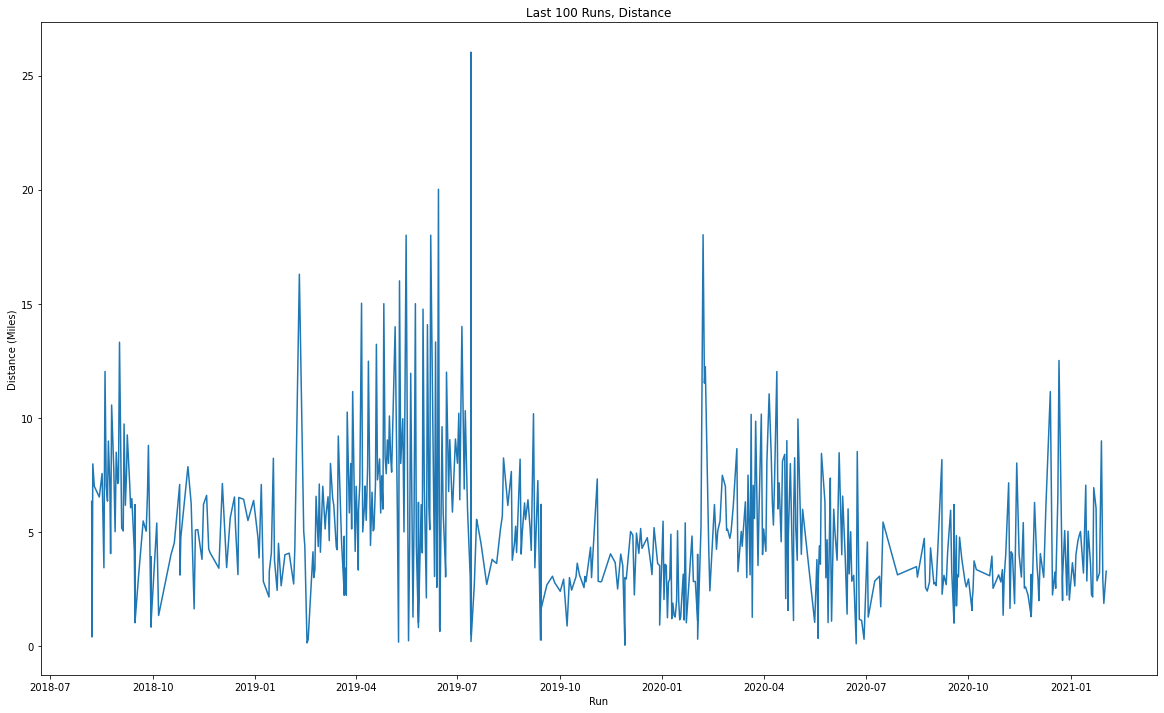

In [38]:
plt.figure(figsize = (20, 12))
plt.plot(garmin_run[garmin_run['Distance'] < 26.5]['Date'], garmin_run[garmin_run['Distance'] < 26.5]['Distance'])
plt.xlabel('Run')
plt.ylabel('Distance (Miles)')
plt.title('Last 100 Runs, Distance')

In [77]:
garmin_run.set_index(garmin_run['Date'], inplace = True)

In [64]:
len(garmin_run['2019':])

285

In [78]:
pace_cols = ['Avg Pace', 'Best Pace']

In [46]:
pd.to_timedelta(garmin_run['Avg Pace'])

ValueError: expected hh:mm:ss format

In [51]:
time = pd.to_timedelta('00:'+garmin_run['Avg Pace'][0])

In [54]:
'12:02:38' + time

Timedelta('0 days 12:10:00')

## Converting Paces to timedeltas for comparison:

In [87]:
for col in pace_cols:
    #print(col)
    for i in range(len(garmin_run[col])):
        try:
            #print(i)
            #print(garmin_run[col][i])
            garmin_run[col][i] = pd.to_timedelta('00:'+garmin_run[col][i])
        except:
            if garmin_run[col][i]==0:
                garmin_run[col][i] = pd.to_timedelta('00:00:00')

<ipython-input-87-efbd2b2a80cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garmin_run[col][i] = pd.to_timedelta('00:00:00')
/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
((pd.DataFrame(garmin_run['Best Pace']))==str).sum()

Best Pace    0
dtype: int64

In [88]:
garmin_run.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 2021-02-01 16:57:42 to 2018-08-07 10:12:37
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             513 non-null    object        
 1   Date                      513 non-null    datetime64[ns]
 2   Favorite                  513 non-null    bool          
 3   Title                     513 non-null    object        
 4   Distance                  513 non-null    object        
 5   Calories                  513 non-null    object        
 6   Time                      513 non-null    object        
 7   Avg HR                    513 non-null    int64         
 8   Max HR                    513 non-null    int64         
 9   Aerobic TE                513 non-null    float64       
 10  Avg Run Cadence           513 non-null    int64         
 11  Max Run Cadence           513 non-null    int64

In [90]:
garmin_run['Avg Pace'][107]

Timedelta('0 days 00:00:00')

In [97]:
r_logo = garmin_run.columns[23][-1]

In [100]:
garmin_run.columns.str.replace(r_logo, '')

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Elev Gain', 'Elev Loss',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Run Cadence.1', 'Max Run Cadence.1', 'Normalized Power (NP)',
       'L/R Balance', 'Training Stress Score', 'Max Avg Power (20 min)',
       'Avg Power', 'Max Power', 'Grit', 'Flow', 'Total Strokes', 'Avg. Swolf',
       'Avg Stroke Rate', 'Climb Time', 'Bottom Time', 'Min Temp',
       'Surface Interval', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp'],
      dtype='object')

In [112]:
garmin_run.columns.str.replace('/', '').str.lower().str.replace('.', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(r_logo, '')

<ipython-input-112-6cdca69e2767>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  garmin_run.columns.str.replace('/', '').str.lower().str.replace('.', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(r_logo, '')


Index(['activity_type', 'date', 'favorite', 'title', 'distance', 'calories',
       'time', 'avg_hr', 'max_hr', 'aerobic_te', 'avg_run_cadence',
       'max_run_cadence', 'avg_pace', 'best_pace', 'elev_gain', 'elev_loss',
       'avg_stride_length', 'avg_vertical_ratio', 'avg_vertical_oscillation',
       'avg_run_cadence_1', 'max_run_cadence_1', 'normalized_power_np',
       'lr_balance', 'training_stress_score', 'max_avg_power_20_min',
       'avg_power', 'max_power', 'grit', 'flow', 'total_strokes', 'avg__swolf',
       'avg_stroke_rate', 'climb_time', 'bottom_time', 'min_temp',
       'surface_interval', 'decompression', 'best_lap_time', 'number_of_laps',
       'max_temp'],
      dtype='object')

In [91]:
#Ok let's make a function for garmin importing to get the data ready for final importation:
#We will need a 'is_race' column, and an 'athlete_id' column to allow us to group like training together, and determine which rows are our target values:
#Also might want a 'type = 'Garmin' 

In [325]:
def import_transf_garmin(filepath, athlete_id, race_dates): #Filepath is the csv filepath, athlete_id is a counter variable, race_dates is the list of race dates
    
    #Read in the dataframe:
    df = pd.read_csv(filepath)
    #Found out this is very important in garmin files:
    df.replace('--', 0, inplace = True)
    
    #Create athlete_id, file type and race category column:
    df['athlete_id'] = athlete_id
    df['filetype'] = 'garmin'
    df['is_race'] = 0
    
    
    #Define the columns to have their data types transformed:
    obj_to_num_cols = ['Calories', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Elev Gain', 'Elev Loss', 'Avg Run Cadence.1', 'Avg Power', 'Max Power']
    pace_cols = ['Avg Pace', 'Best Pace']
    
    #Convert the numeric columns:
    for col in obj_to_num_cols:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            try:
                df[col] = pd.to_numeric(df[col].str.extract(r'd+'))
            except:
                pass
    
    #Convert the pace columns:
    for col in pace_cols:
        for i in range(len(df[col])):
            try:
                df[col][i] = pd.to_timedelta('00:'+df[col][i])
            except:
                #print(f'col={col}')
                #print(f'i= {i}')
                #print(f'df[col][i] = {df[col][i]}')
                if df[col][i]==0:
                    df[col][i] = pd.to_timedelta('00:00:00')
                else:
                    pass
                pass
    
    #Clean up the column names:
    #This is to remove the (R) logo so it doesn't cause any issues later:
    r_logo = df.columns[df.columns.str.contains('Training Stress')][0][-1]
    #Clean up the column names:
    df.columns = df.columns.str.replace('/', '').str.lower().str.replace('.', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(r_logo, '')
    df.set_index(df['date'], inplace = True)
    df.index = pd.to_datetime(df.index)
    ###Write a function to change the race dates in race_dates to a '1'
    
    #Write out the file to the data folder:
    df.to_csv(f'./data/clean/garmin_clean/clean_{athlete_id}.csv')

In [70]:
import_transf_garmin('./data/raw/Garmin/Activities_Anel_Akiyanova.csv', 2, [])

col=Avg Pace
i= 9
df[col][i] = 0


<ipython-input-57-d5dde7da7043>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = pd.to_timedelta('00:'+df[col][i])
<ipython-input-57-d5dde7da7043>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = pd.to_timedelta('00:00:00')
<ipython-input-57-d5dde7da7043>:47: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('/', '').str.lower().str.replace('.', '_').str.replace(' ', '_').str.replace('(', '').str.replace('

In [273]:
test = pd.read_csv('./data/clean/garmin_clean/clean_2.csv', index_col='date').drop('date.1', axis =1)

In [274]:
test.head()

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,avg_run_cadence,max_run_cadence,...,bottom_time,min_temp,surface_interval,decompression,best_lap_time,number_of_laps,max_temp,athlete_id,filetype,is_race
date,,,,,,,,,,,,,,,,,,,,,
2020-05-29 08:43:31,Running,False,Philadelphia Running,10.15,649,01:29:10,146,180,192,236,...,0:00,0.0,0:00,No,01:25.39,11,0.0,2,garmin,0
2020-05-28 07:39:57,Running,False,Philadelphia Running,7.90,592,01:04:58,150,198,196,202,...,0:00,0.0,0:00,No,07:26.88,8,0.0,2,garmin,0
2020-05-27 08:12:33,Running,False,Philadelphia Running,8.01,584,01:06:32,148,164,196,204,...,0:00,0.0,0:00,No,00:03.14,9,0.0,2,garmin,0
2020-05-26 06:45:42,Running,False,Philadelphia Running,7.20,537,01:00:14,149,167,188,200,...,0:00,0.0,0:00,No,01:49.06,8,0.0,2,garmin,0
2020-05-25 08:02:30,Running,False,Philadelphia Running,7.28,513,01:00:11,148,161,194,202,...,0:00,0.0,0:00,No,02:41.30,8,0.0,2,garmin,0


In [80]:
#https://stackoverflow.com/questions/21269399/datetime-dtypes-in-pandas-read-csv#:~:text=There%20is%20no%20datetime%20dtype,end%20up%20with%20a%20string.
#Very interesting. I will have to make columns a datetime after I import them!

In [103]:
import re

In [142]:
test_str = '2020-05-29'

In [161]:
match = re.match("\d+-\d\d-?\d\d", test_str)

In [162]:
match[0]

'2020-05-29'

In [173]:
test_2 = '2020-05-29 07:15:35'

In [206]:
type(test.index.to_series().astype('str'))

pandas.core.series.Series

In [225]:
time_of_day = [re.findall("\d\d:\d\d:\d\d", test.index.to_series().astype('str')[i])[0] for i in range(len(test))]

In [313]:
test['time_of_day'] = time_of_day
test['time_of_day'][:3]

date
2020-05-29    08:43:31
2020-05-28    07:39:57
2020-05-27    08:12:33
Name: time_of_day, dtype: object

In [231]:
test['time_of_day'] = pd.to_timedelta(test['time_of_day'])

In [76]:
type(test.index)

pandas.core.indexes.base.Index

In [232]:
test.index = pd.DatetimeIndex(test.index).normalize()

In [235]:
test.head(20)

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,avg_run_cadence,max_run_cadence,...,min_temp,surface_interval,decompression,best_lap_time,number_of_laps,max_temp,athlete_id,filetype,is_race,time_of_day
date,,,,,,,,,,,,,,,,,,,,,
2020-05-29,Running,False,Philadelphia Running,10.15,649,01:29:10,146,180,192,236,...,0.0,0:00,No,01:25.39,11,0.0,2,garmin,0,0 days 08:43:31
2020-05-28,Running,False,Philadelphia Running,7.90,592,01:04:58,150,198,196,202,...,0.0,0:00,No,07:26.88,8,0.0,2,garmin,0,0 days 07:39:57
2020-05-27,Running,False,Philadelphia Running,8.01,584,01:06:32,148,164,196,204,...,0.0,0:00,No,00:03.14,9,0.0,2,garmin,0,0 days 08:12:33
2020-05-26,Running,False,Philadelphia Running,7.20,537,01:00:14,149,167,188,200,...,0.0,0:00,No,01:49.06,8,0.0,2,garmin,0,0 days 06:45:42
2020-05-25,Running,False,Philadelphia Running,7.28,513,01:00:11,148,161,194,202,...,0.0,0:00,No,02:41.30,8,0.0,2,garmin,0,0 days 08:02:30
2020-05-24,Running,False,Philadelphia Running,7.03,582,00:58:40,160,202,194,200,...,0.0,0:00,No,04:00.73,4,0.0,2,garmin,0,0 days 08:33:30
2020-05-23,Running,False,Philadelphia Running,12.58,920,01:47:38,149,179,192,200,...,0.0,0:00,No,00:39.54,13,0.0,2,garmin,0,0 days 10:03:16
2020-05-22,Running,False,Philadelphia Running,5.95,424,00:49:00,150,168,192,202,...,0.0,0:00,No,07:42.03,6,0.0,2,garmin,0,0 days 17:06:03
2020-05-21,Running,False,Philadelphia Running,10.20,866,01:28:31,163,200,196,204,...,0.0,0:00,No,01:53.69,11,0.0,2,garmin,0,0 days 07:38:53


In [266]:
test['athlete_id'][0]

2

In [254]:
race_dates = ['2020-05-09']

In [259]:
#pull out the test dates
test[test.index.isin(race_dates)]['is_race']

date
2020-05-09    0
Name: is_race, dtype: int64

In [262]:
test['is_race'] = np.where(test.index.isin(race_dates), 1, 0)


In [263]:
test[test.index.isin(race_dates)]['is_race']

date
2020-05-09    1
Name: is_race, dtype: int64

In [328]:
test_athlete_dict = {2:{'race_date_list':['2020-05-09'],
                          'age':35, 'gender':'F', 
                          'race_count':1, 
                          'training_elevation':1000, 
                          'max_hr':175}, 
                     3:{'race_date_list':['2018-05-05','2018-06-10', '2018-09-02', '2019-10-13', '2019-07-27', '2019-06-09'], 
                          'age':33, 'gender':'M', 
                          'race_count':2, 
                          'training_elevation':5280, 
                          'max_hr':185}
                    }

In [312]:
test_athlete_dict[3]['race_date_list']

['2018-06-09', '2018-09-02', '2019-10-13', '2019-07-27', '2019-06-09']

In [283]:
from datetime import datetime, timedelta

In [287]:
month = timedelta(31)

In [291]:
pd.to_datetime(test_athlete_dict[3]['race_date_list'][0])-month*3

Timestamp('2018-03-08 00:00:00')

In [294]:
test.index = pd.DatetimeIndex(test.index).normalize()
test.index

DatetimeIndex(['2020-05-29', '2020-05-28', '2020-05-27', '2020-05-26',
               '2020-05-25', '2020-05-24', '2020-05-23', '2020-05-22',
               '2020-05-21', '2020-05-18', '2020-05-18', '2020-05-17',
               '2020-05-16', '2020-05-15', '2020-05-14', '2020-05-13',
               '2020-05-12', '2020-05-11', '2020-05-09', '2020-05-07',
               '2020-05-06', '2020-05-05', '2020-05-04', '2020-05-03',
               '2020-05-02', '2020-05-01', '2020-04-29', '2020-04-28',
               '2020-04-27', '2020-04-26', '2020-04-26', '2020-04-25',
               '2020-04-23', '2020-04-22', '2020-04-21', '2020-04-19',
               '2020-04-18', '2020-04-17', '2020-04-16', '2020-04-15',
               '2020-04-14', '2020-04-13', '2020-04-12', '2020-04-11',
               '2020-04-10', '2020-04-10', '2020-04-08', '2020-04-07',
               '2020-04-06', '2020-04-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [303]:
date_1 = pd.to_datetime('2020-05-05')

In [304]:
test[date_1:(date_1-month)]

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,avg_run_cadence,max_run_cadence,...,bottom_time,min_temp,surface_interval,decompression,best_lap_time,number_of_laps,max_temp,athlete_id,filetype,is_race
date,,,,,,,,,,,,,,,,,,,,,
2020-05-05,Running,False,Philadelphia Running,7.10,722,01:00:18,188,210,194,202,...,0:00,0.0,0:00,No,01:01.35,8,0.0,2,garmin,0
2020-05-04,Running,False,Philadelphia Running,7.04,551,01:01:22,154,200,196,204,...,0:00,0.0,0:00,No,00:27.69,8,0.0,2,garmin,0
2020-05-03,Running,False,Philadelphia Running,10.05,818,01:31:30,152,155,188,202,...,0:00,0.0,0:00,No,00:28.55,11,0.0,2,garmin,0
2020-05-02,Running,False,Philadelphia Running,7.11,449,01:01:51,135,170,194,204,...,0:00,0.0,0:00,No,01:16.38,8,0.0,2,garmin,0
2020-05-01,Running,False,Philadelphia Running,14.85,803,02:12:45,140,161,194,212,...,0:00,0.0,0:00,No,07:45.87,15,0.0,2,garmin,0
2020-04-29,Running,False,Philadelphia Running,8.00,663,01:05:57,170,203,196,206,...,0:00,0.0,0:00,No,00:02.61,9,0.0,2,garmin,0
2020-04-28,Running,False,Philadelphia Running,7.98,567,01:07:02,152,190,196,202,...,0:00,0.0,0:00,No,07:47.81,8,0.0,2,garmin,0
2020-04-27,Running,False,Philadelphia Running,7.99,814,01:07:44,189,195,196,212,...,0:00,0.0,0:00,No,07:35.15,8,0.0,2,garmin,0
2020-04-26,Running,False,Philadelphia Running,1.64,344,00:41:32,150,190,148,212,...,0:00,0.0,0:00,No,19:10.25,2,0.0,2,garmin,0


In [321]:
def set_up_for_prediction(df_filepath, athlete_dict):
    
    '''
    Inputs: csv filepath, and athlete dictionary
    -Dictionary contains an entry for race date, keyed to athlete id
    Outputs: 
        1) a csv with races indicated, indexed by time series
        2) a csv with summary values for 1 week, 2 weeks, 1 month, 2 months, 3 months
            - If values are not available, they will be 0s
    '''
    #Read in the csv:
    working = pd.read_csv(df_filepath, index_col='date').drop('date.1', axis =1)
    
    athlete_id = working['athlete_id'][0]
    
    #get the race dates for the selected athlete:
    race_dates = athlete_dict[athlete_id]['race_date_list']
    
    #Set the index as a datetime:
    working.index = pd.to_datetime(working.index)
    
    #Create a month interval: (we can multiply by 3 to get the 3 month values)
    month = timedelta(31)
    day = timedelta(1)
    
    #Create a time of day column:
    time_of_day = [re.findall("\d\d:\d\d:\d\d", working.index.to_series().astype('str')[i])[0] for i in range(len(working))]
    
    #Drop the hours and minutes and seconds:
    working.index = pd.DatetimeIndex(working.index).normalize()
    
    #Label all of the races:
    working['is_race'] = np.where(working.index.isin(race_dates), 1, 0)
    
    #select the last month and last 3 months of data from the working file, and export them as separate csvs to the 'races' folder:
    
    for i in range(len(race_dates)):
        #i is the counter, find the 1 month and 3 month data:
        rd = pd.to_datetime(race_dates[i])
        race_1_mo_back = working[rd+day:rd-month]
        race_1_mo_back.sort_index(inplace=True)
        race_1_mo_back.to_csv(f'./data/races/athlete_{athlete_id}_race_{i}_1_mo.csv')
        try:
            #This way if there is not 3 months data, it just skips out.
            race_3_mo_back = working[rd+day:(rd-month*3)]
            race_3_mo_back.sort_index(inplace=True)
            race_3_mo_back.to_csv(f'./data/races/athlete_{athlete_id}_race_{i}_3_mo.csv')
        except:
            pass



In [308]:
test_athlete_dict[3]['race_date_list']

['2018-06-09', '2018-10-02']

In [329]:
import_transf_garmin('./data/raw/Garmin/Keith_Activities_2018-Present.csv', 3, test_athlete_dict[3]['race_date_list'])

In [330]:
set_up_for_prediction('./data/clean/garmin_clean/clean_3.csv', test_athlete_dict)

In [319]:
import warnings
warnings.filterwarnings("ignore")


In [320]:
#Alright  I have a data pipeline that will spit out all my races with 1 month and 3 month histories.
#Going to write a clean notebook for it.

In [345]:
n = 2
with open('./data/athletes.json') as json_file: 
    data = json.load(json_file)
    print(data[str(n)]['race_date_list'])
type(data)

['2020-05-09']


dict

In [348]:
def add_to_athletes(race_list, age, gender, trng_elev, max_hr):
    with open('./data/athletes.json') as json_file: 
        data = json.load(json_file)
        print(len(data))
        athlete_stats = {
            "race_date_list":race_list,
            "age":age,
            "race_count":len(race_list),
            "training_elevation":trng_elev,
            "max_hr":max_hr
        }
        data.append(
        {str(len(data)+1):athlete_stats}
        )
    with open('./data/athletes.json', "w") as output:  
        json.dump(data, output) 

In [349]:
riggs = pd.read_csv('./data/raw/Garmin/Riggs Activities r4 w favorites.csv')

In [367]:
riggs['Max HR'].replace('--', 0, inplace=True);
riggs['Avg HR'].replace('--', 0, inplace=True);

In [366]:
pd.to_numeric(riggs['Max HR']).max()

247

In [368]:
pd.to_numeric(riggs['Avg HR']).max()

183

In [372]:
riggs[pd.to_numeric(riggs['Max HR'])  >195]

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Total Reps,Total Sets,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
269,Running,2020-06-13 11:34:51,False,Boulder Running,6.21,854,00:48:21,183,202,5.0,...,--,--,48:21,0:00,78.8,0:00,No,01:37.49,7,0.0
301,Indoor Cycling,2020-05-27 18:01:07,False,West Vidette - TrainerRoad,14.56,506,00:45:00,123,239,--,...,--,--,45:00,0:00,0.0,0:00,No,01:00.00,17,0.0
350,Indoor Cycling,2020-04-15 16:12:21,False,Baxter - TrainerRoad,27.27,998,01:30:00,116,213,--,...,--,--,1:30:00,0:00,0.0,0:00,No,01:00.00,38,0.0
353,Treadmill Running,2020-04-12 08:30:33,False,Treadmill Running,11.86,"1,299",01:36:41,155,196,3.8,...,--,--,1:36:41,0:00,64.4,0:00,No,09:13.96,6,0.0
366,Treadmill Running,2020-04-01 18:53:49,False,Treadmill Running,2.25,270,00:25:59,152,247,2.4,...,--,--,25:59,0:00,71.6,0:00,No,10:59.54,2,0.0
1220,Indoor Cycling,2017-08-29 05:26:40,False,FTP Test 8 - 313W (298W FTP),0.00,781,01:00:04,161,197,4.8,...,--,--,1:00:04,0:00,71.6,0:00,No,00:00.00,--,0.0
1360,Indoor Cycling,2017-04-05 05:54:22,False,Indoor Cycling,0.00,804,01:16:24,150,196,3.8,...,--,--,1:16:24,0:00,59.0,0:00,No,00:00.00,--,0.0
